# WEEK 4

## Loading the data

Check if the missing values are presented in the features.
If there are missing values:
- For caterogiral features, replace them with 'NA'
- For numerical features, replace with with 0.0



In [3]:
import wget
import pandas as pd
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
wget.download(data)
df = pd.read_csv('course_lead_scoring.csv')

100% [..............................................................................] 80876 / 80876

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [13]:
print(df.isnull().sum())


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index) 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 


In [14]:
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [10]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [15]:
null_data = df[df.isnull().any(axis=1)]
#null_data

In [22]:
df2=pd.DataFrame()

In [25]:
df['lead_source'].fillna('NA', inplace=True)

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_11912\3538553470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lead_source'].fillna('NA', inplace=True)


In [28]:
for c in categorical_columns:
    df[c].fillna('NA', inplace=True)

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_11912\2027781595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna('NA', inplace=True)


In [29]:
print(df.isnull().sum())


lead_source                   0
industry                      0
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [30]:
df['annual_income'].fillna(  0.0, inplace=True)     

C:\Users\hanaa.hammad\AppData\Local\Temp\ipykernel_11912\1769733693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_income'].fillna(  0.0, inplace=True)


In [31]:
print(df.isnull().sum())


lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [34]:
df.shape, df.columns

((1462, 9),
 Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
        'employment_status', 'location', 'interaction_count', 'lead_score',
        'converted'],
       dtype='object'))

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values
 
del df_train['converted']
del df_val['converted']
del df_test['converted'] 

# Question 1: ROC AUC feature importance


In [ ]:

dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

In [40]:
categorical_columns
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [41]:
df.dtypes
numerical = ['number_of_courses_viewed', 'annual_income','interaction_count', 'lead_score']

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer


In [46]:
dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical_columns + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hanaa.hammad\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:

val_dict = df_val[categorical_columns + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
(y_val == converted_decision).mean()

np.float64(0.8020477815699659)

In [61]:
y_pred.shape, X_val.shape

((293,), (293, 31))

#### ROC

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [68]:
df_test.shape

(293, 8)

In [70]:
 
test_dict = df_test[categorical_columns + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)
 
X_test.shape

(293, 31)

In [71]:
X_train.shape

(876, 31)

In [72]:
y_test.shape

(293,)

In [73]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#### PLOT the curve

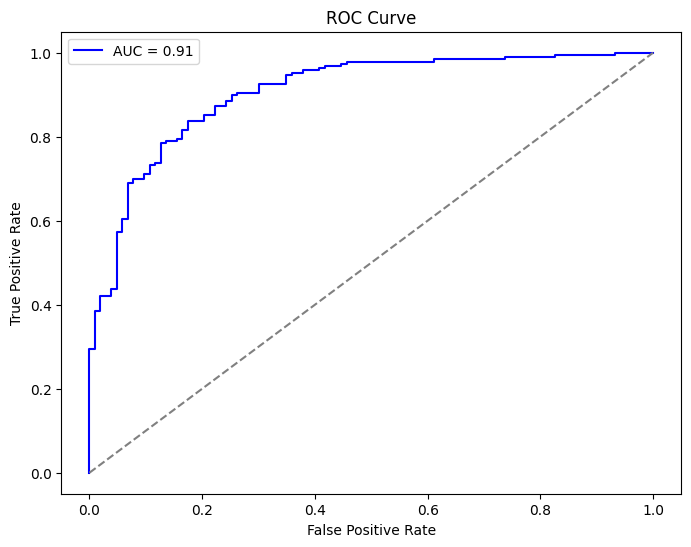

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import auc
# auc needs values for x-axis and y-axis
auc(fpr, tpr)
# Output: 0.843850505725819

0.9053653551354113

In [79]:
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)

0.8899913718723037

In [81]:
y_val

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

### ROC and AUC

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])


AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


Which numerical variable (among the following 4) has the highest AUC?

In [83]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [82]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

np.float64(0.8020477815699659)

In [84]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,171,122,0,0
10,0.1,170,101,1,21
20,0.2,166,80,5,42
30,0.3,164,68,7,54
40,0.4,157,48,14,74
50,0.5,152,39,19,83
60,0.6,144,26,27,96
70,0.7,130,14,41,108
80,0.8,110,10,61,112
90,0.9,82,4,89,118


In [85]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

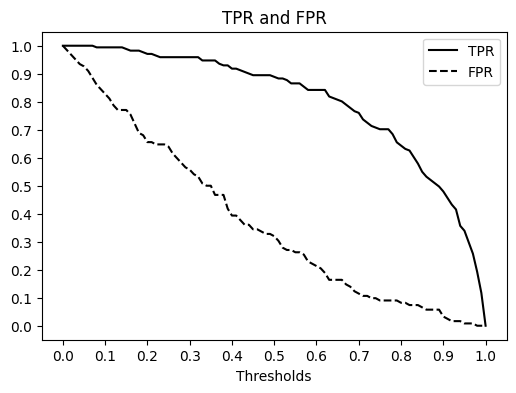

In [86]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

# Question 2: Training the model


# Question 3: Precision and Recall


# Question 4: F1 score

# Question 5: 5-Fold CV


# Question 6: Hyperparameter Tuning
